In [1]:
# !code --disable-extensionsa

In [2]:
import pandas as pd

# Load your CSV
data_path =(r"C:\Users\Admin\OneDrive\Documents\Office_work\Cost Estimation\data\vehicle_program_data.csv")
df = pd.read_csv(data_path)

# Exclude target column if needed
target_column = "Estimated CAPEX ($M)"
feature_cols = [col for col in df.columns if col != target_column]

# Map pandas dtypes to Python types for Pydantic
dtype_mapping = {
    "int64": "int",
    "float64": "float",
    "object": "str",
    "bool": "bool"
}

print("class InputData(BaseModel):")
for col in feature_cols:
    pandas_type = str(df[col].dtype)
    py_type = dtype_mapping.get(pandas_type, "str")  # default to str if unknown
    print(f"    {col.replace(' ', '_')}: {py_type}")


class InputData(BaseModel):
    Vehicle_Type: str
    Material_Type: str
    Drivetrain: str
    Automation_Level: str
    Plant_Age: str
    Line_Reuse: str
    Lifetime_Volume: int
    Target_Annual_Volume: float
    Variants: int
    Number_of_Parts: int
    Avg_Part_Complexity: float
    BIW_Weight: float
    Stamping_Dies: int
    Injection_Molds: int
    Casting_Tools: float
    Jigs_and_Fixtures: int
    Assembly_Line_Equipment: float
    Robotics: float
    Paint_Shop_Mods: float
    Estimated_CAPEX: float


### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Office_work\Cost Estimation\data\vehicle_program_data.csv")
df.head()

,Vehicle Type,Material Type,Drivetrain,Automation Level,Plant Age,Line Reuse,Lifetime Volume,Target Annual Volume,Variants,Number of Parts,Avg Part Complexity,BIW Weight (kg),Stamping Dies,Injection Molds,Casting Tools,Jigs & Fixtures,Assembly Line Equipment ($M),Robotics ($M),Paint Shop Mods ($M),Estimated CAPEX ($M)
0,Hatchback,Steel,ICE,Low,20+ yrs,Yes,131724,16465.500000,4,454,2.246049,954.865570,104,91,45.0,70,18.16,3.037931,5.321391,156.288886
1,Pickup,Steel,Hybrid,Low,20+ yrs,No,72901,9112.625000,4,731,4.131694,2216.958879,305,149,73.0,113,29.24,3.988697,8.787797,310.618219
2,EV Sedan,Composite,EV,High,10-20 yrs,Yes,210569,70189.666667,3,769,2.770619,1517.180974,222,155,91.2,116,46.14,5.700506,7.144190,296.496212
3,Pickup,Aluminum,ICE,Low,New,No,127192,14132.444444,1,311,2.941067,2174.384134,95,64,37.2,48,3.11,3.405537,3.596252,116.611604
4,Pickup,Steel,EV,Low,10-20 yrs,No,182646,60882.000000,4,1184,4.111638,2248.327213,487,239,118.0,178,47.36,4.158913,14.337920,502.744716


### Analysis of the dataset

In [4]:
df.describe()

,Lifetime Volume,Target Annual Volume,Variants,Number of Parts,Avg Part Complexity,BIW Weight (kg),Stamping Dies,Injection Molds,Casting Tools,Jigs & Fixtures,Assembly Line Equipment ($M),Robotics ($M),Paint Shop Mods ($M),Estimated CAPEX ($M)
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,154381.29300,29494.527836,2.458000,716.254000,2.980912,1549.947564,216.720000,145.341000,80.522200,109.490000,26.241785,4.383100,6.578402,260.570028
std,83190.81008,20277.907824,1.110617,289.178713,1.153648,438.134903,121.515364,57.774013,33.302366,43.398633,18.666082,2.124421,4.440114,108.523310
min,10320.00000,1314.375000,1.000000,201.000000,1.000964,850.530349,27.000000,43.000000,20.000000,32.000000,2.060000,1.004348,0.213138,58.450548
25%,82492.75000,14314.625000,1.000000,469.500000,1.987553,1150.118535,120.000000,96.000000,51.600000,72.000000,11.815000,2.704427,3.445887,167.289290
50%,153072.00000,25713.000000,2.000000,722.000000,2.943344,1595.765387,194.500000,146.000000,81.000000,111.000000,20.985000,4.048101,5.587178,257.819763
75%,228876.00000,40117.500000,3.000000,967.250000,4.016374,1835.686618,293.250000,195.000000,109.000000,147.250000,35.825000,5.601726,8.587958,342.752082
max,299987.00000,99169.000000,4.000000,1199.000000,4.996829,2327.019555,594.000000,243.000000,142.800000,183.000000,93.360000,9.997085,29.025514,567.377876


### Checking the distribution of the data

Numerical features (14): ['Lifetime Volume', 'Target Annual Volume', 'Variants', 'Number of Parts', 'Avg Part Complexity', 'BIW Weight (kg)', 'Stamping Dies', 'Injection Molds', 'Casting Tools', 'Jigs & Fixtures', 'Assembly Line Equipment ($M)', 'Robotics ($M)', 'Paint Shop Mods ($M)', 'Estimated CAPEX ($M)']

Categorical features (6): ['Vehicle Type', 'Material Type', 'Drivetrain', 'Automation Level', 'Plant Age', 'Line Reuse']


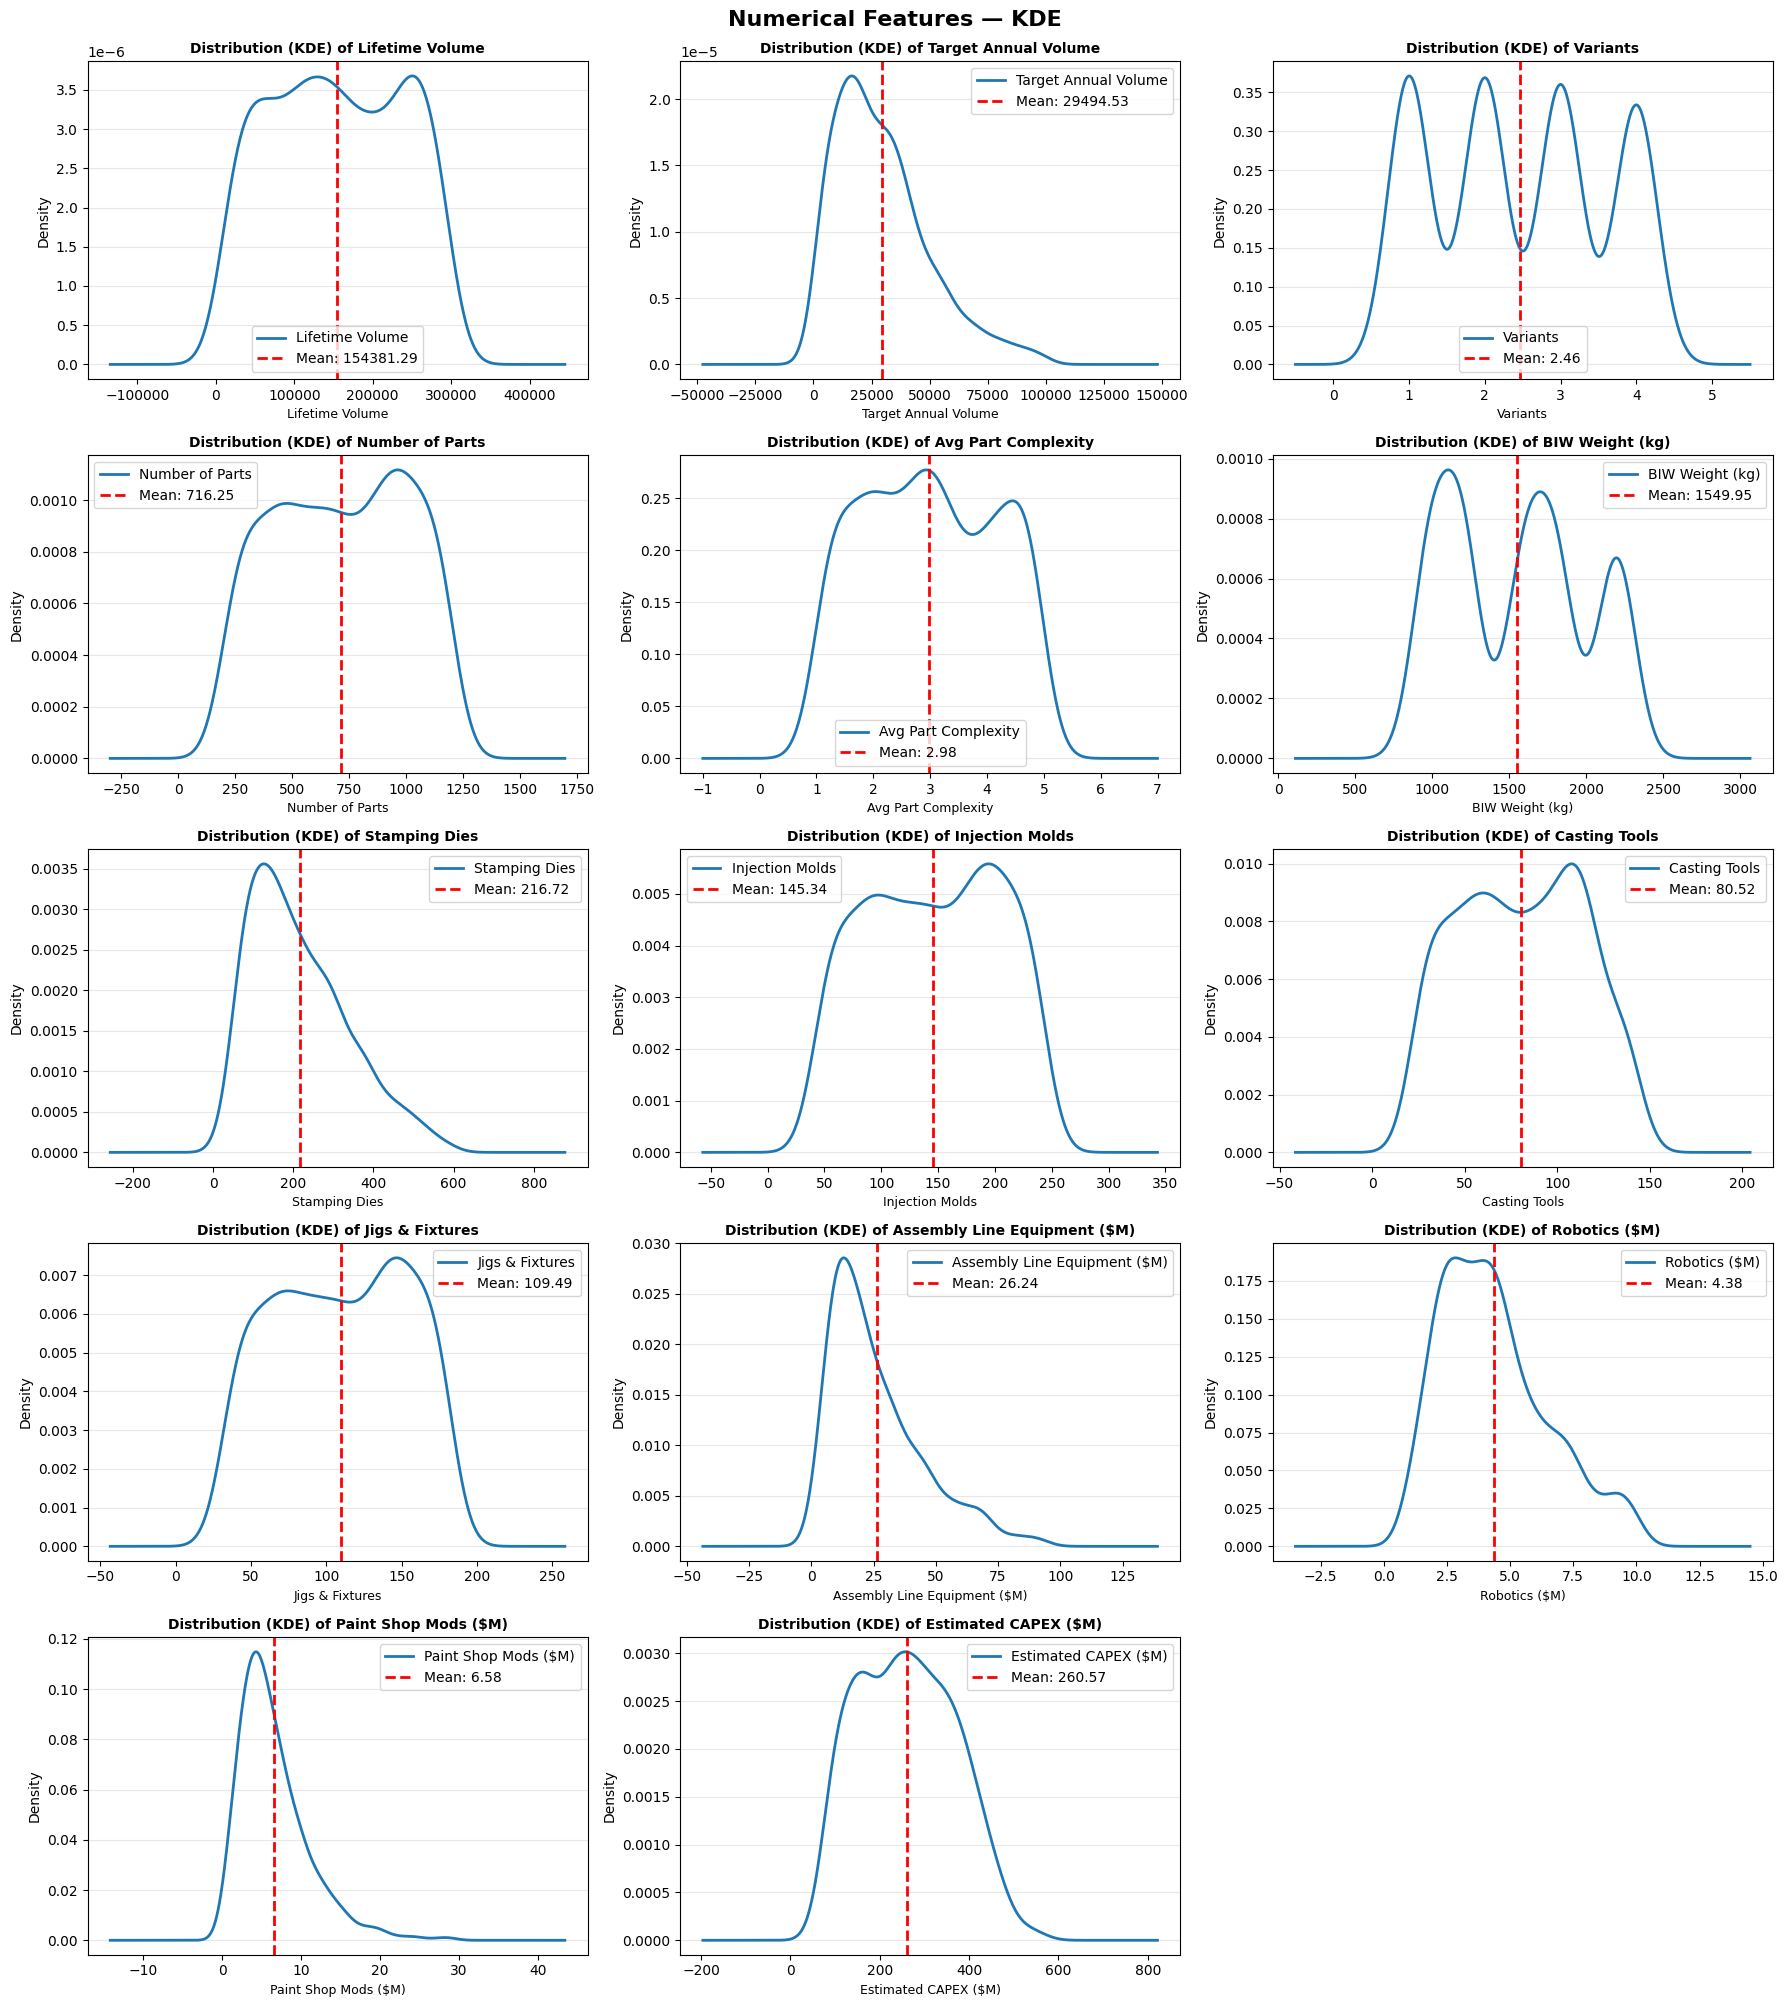

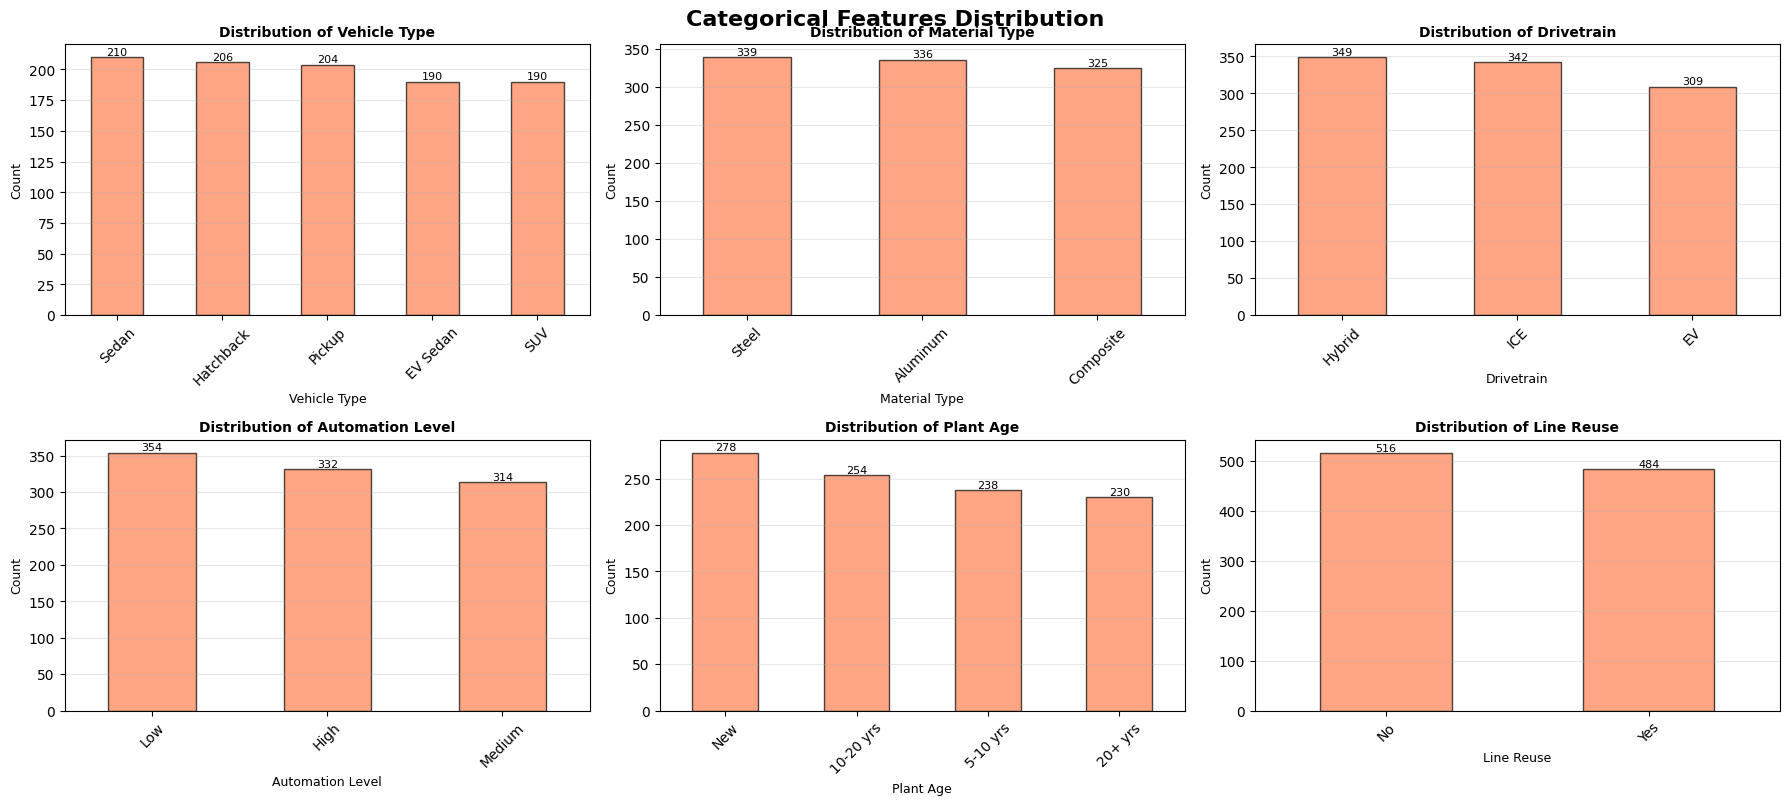

In [5]:
### Identify all the numerical and categorical features and plot the distrition
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"\nCategorical features ({len(categorical_features)}): {categorical_features}")

# Plot distributions for numerical features
# if numerical_features:
#     n_cols = 3
#     n_rows = (len(numerical_features) + n_cols - 1) // n_cols
    
#     fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
#     axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes
    
#     for idx, feature in enumerate(numerical_features):
#         ax = axes[idx]
#         df[feature].hist(bins=20, ax=ax, edgecolor='black', alpha=0.7, color='steelblue')
#         ax.set_title(f'Distribution of {feature}', fontsize=10, fontweight='bold')
#         ax.set_xlabel(feature, fontsize=9)
#         ax.set_ylabel('Frequency', fontsize=9)
#         ax.grid(axis='y', alpha=0.3)
        
#         # Add mean line
#         mean_val = df[feature].mean()
#         ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
#         ax.legend()
    
#     # Hide extra subplots
#     for idx in range(len(numerical_features), len(axes)):
#         axes[idx].axis('off')
    
#     plt.tight_layout()
#     plt.suptitle('Numerical Features Distribution', fontsize=16, fontweight='bold', y=1.001)
#     plt.show()

# KDE plots for numerical features
if numerical_features:
    n_cols = 3
    n_rows = (len(numerical_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten()
    
    for idx, feature in enumerate(numerical_features):
        ax = axes[idx]
        df[feature].plot(kind='kde', ax=ax, linewidth=2)
        
        ax.set_title(f'Distribution (KDE) of {feature}', fontsize=10, fontweight='bold')
        ax.set_xlabel(feature, fontsize=9)
        ax.grid(axis='y', alpha=0.3)
        
        # Mark mean
        mean_val = df[feature].mean()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.legend()
    
    # Hide unused subplots
    for idx in range(len(numerical_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Numerical Features — KDE', fontsize=16, fontweight='bold', y=1.001)
    plt.show()
    
# Plot distributions for categorical features
if categorical_features:
    n_cols = 3
    n_rows = (len(categorical_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes
    
    for idx, feature in enumerate(categorical_features):
        ax = axes[idx]
        value_counts = df[feature].value_counts()
        value_counts.plot(kind='bar', ax=ax, color='coral', edgecolor='black', alpha=0.7)
        ax.set_title(f'Distribution of {feature}', fontsize=10, fontweight='bold')
        ax.set_xlabel(feature, fontsize=9)
        ax.set_ylabel('Count', fontsize=9)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(axis='y', alpha=0.3)
        
        # Add count labels on bars
        for i, v in enumerate(value_counts):
            ax.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=8)
    
    # Hide extra subplots
    for idx in range(len(categorical_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.suptitle('Categorical Features Distribution', fontsize=16, fontweight='bold', y=1.001)
    plt.show()


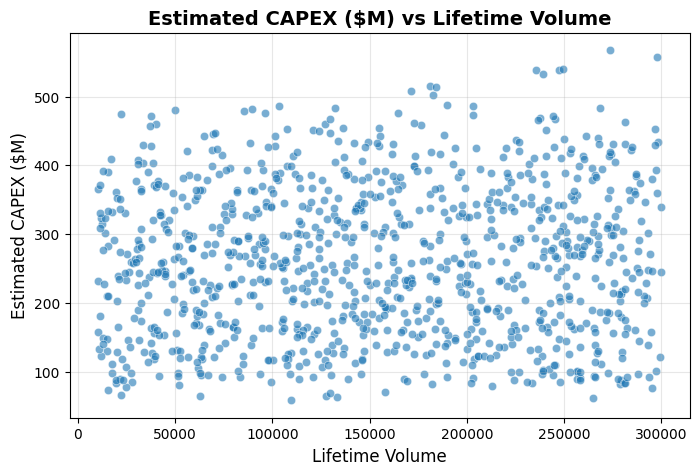

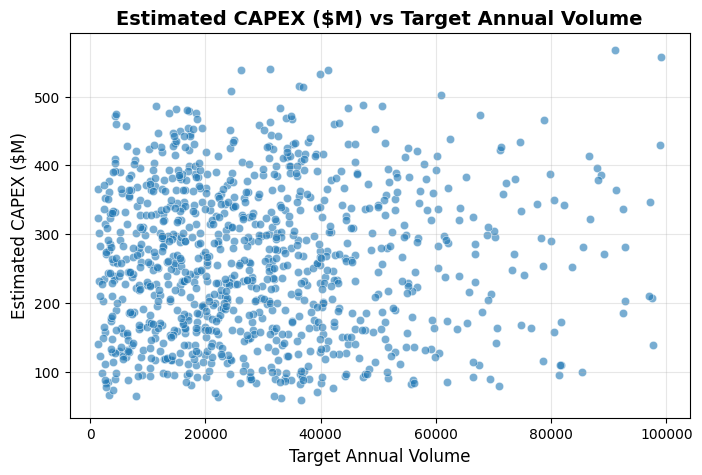

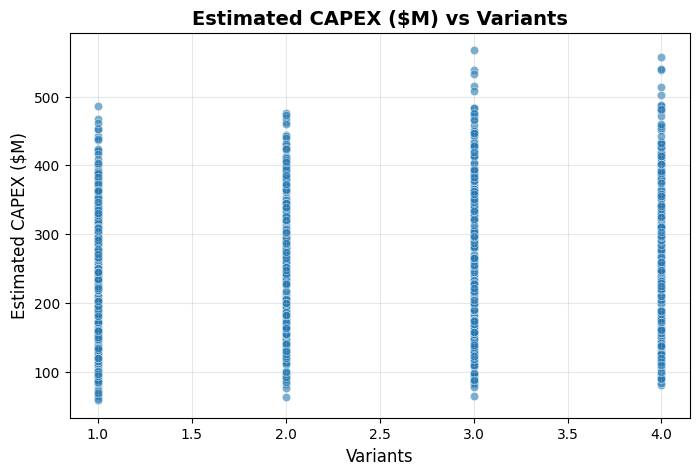

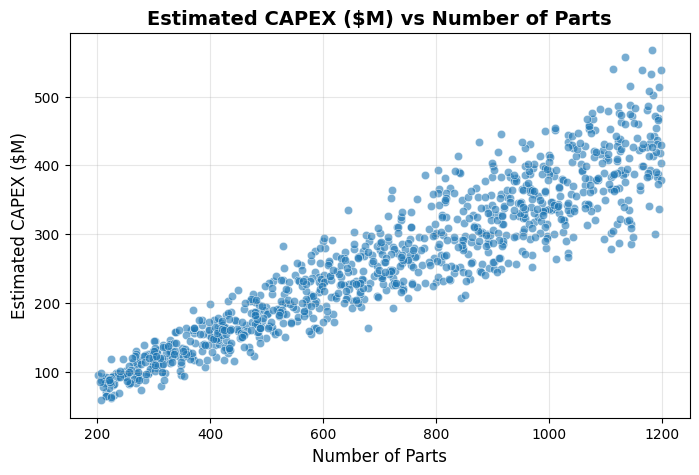

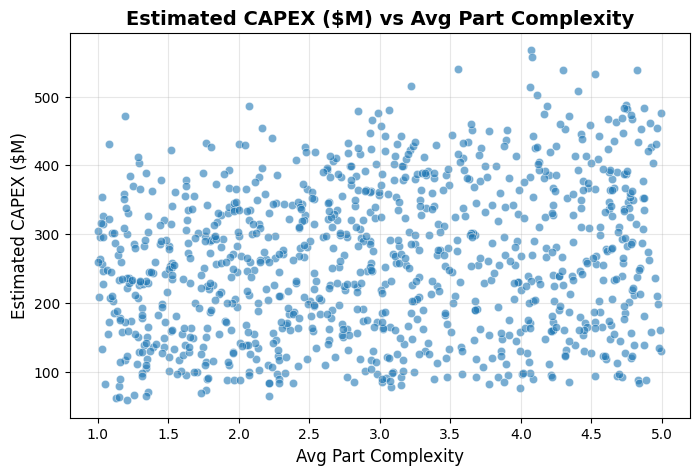

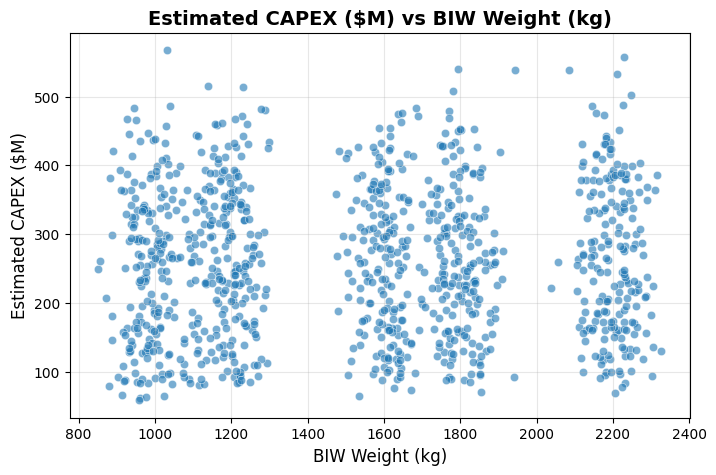

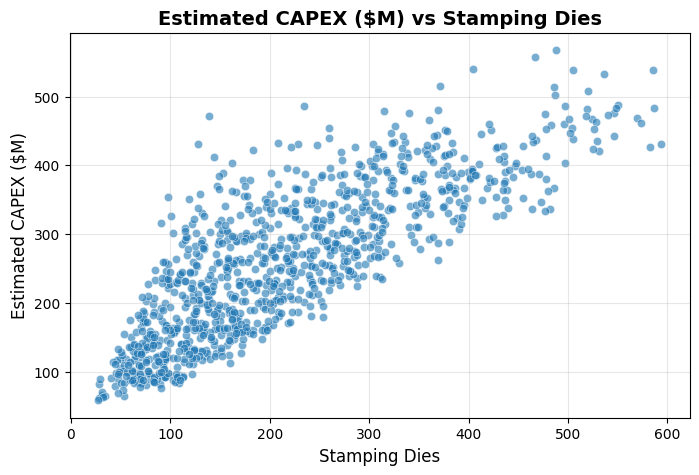

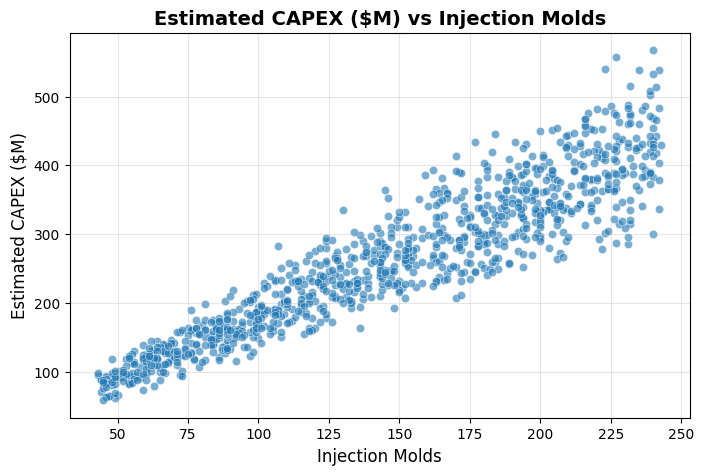

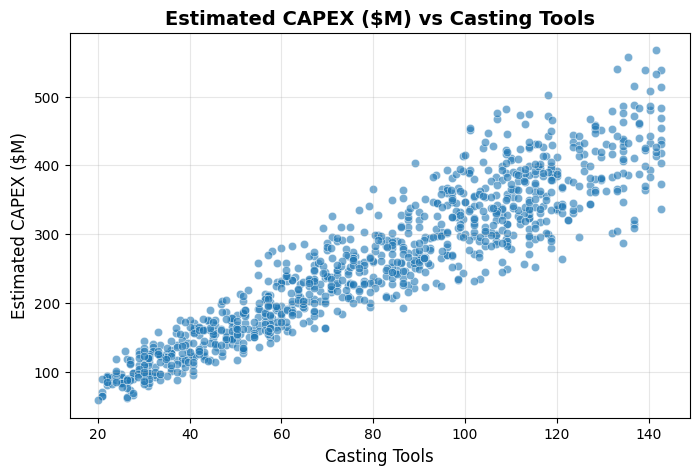

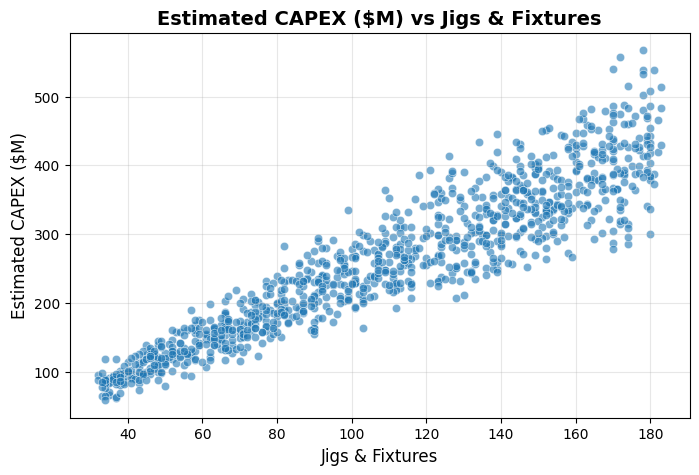

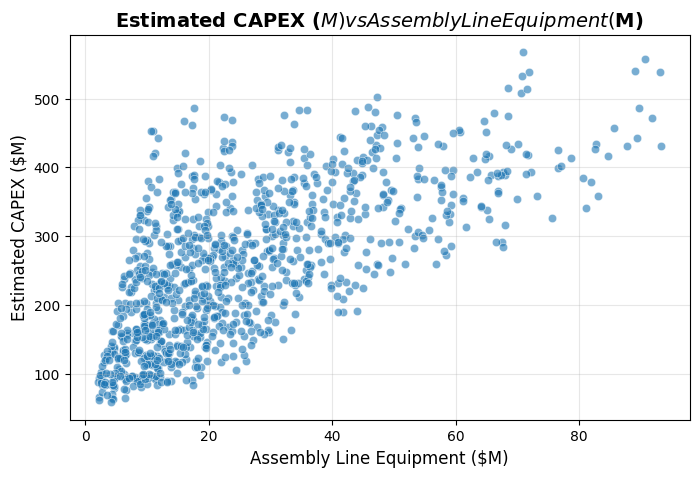

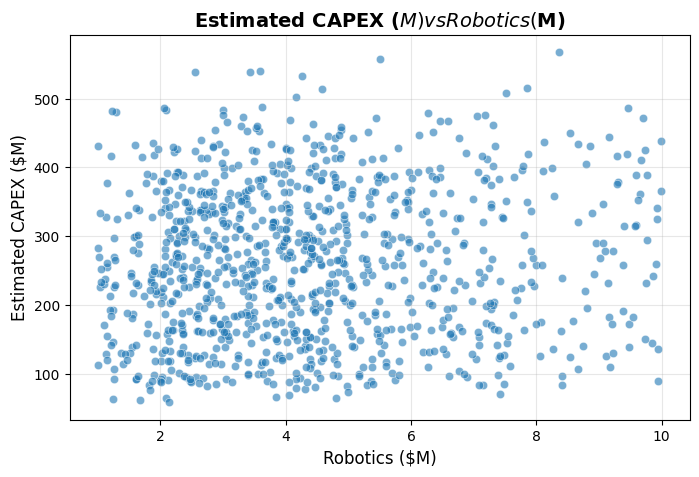

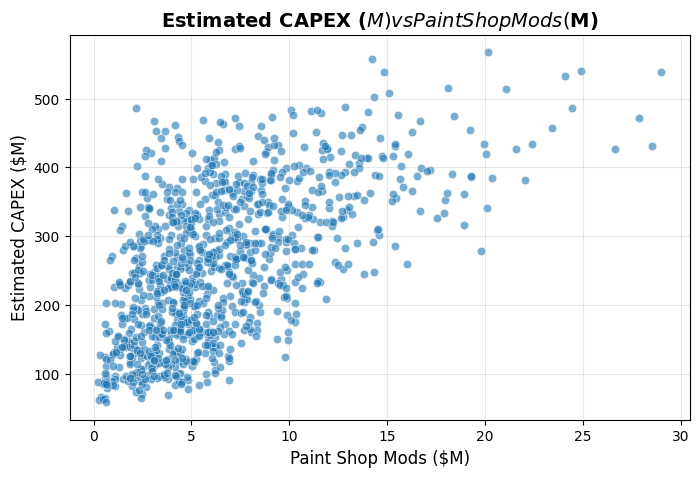

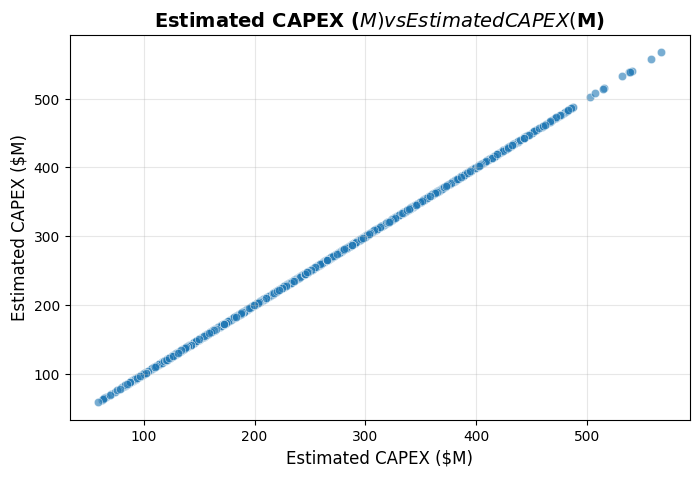

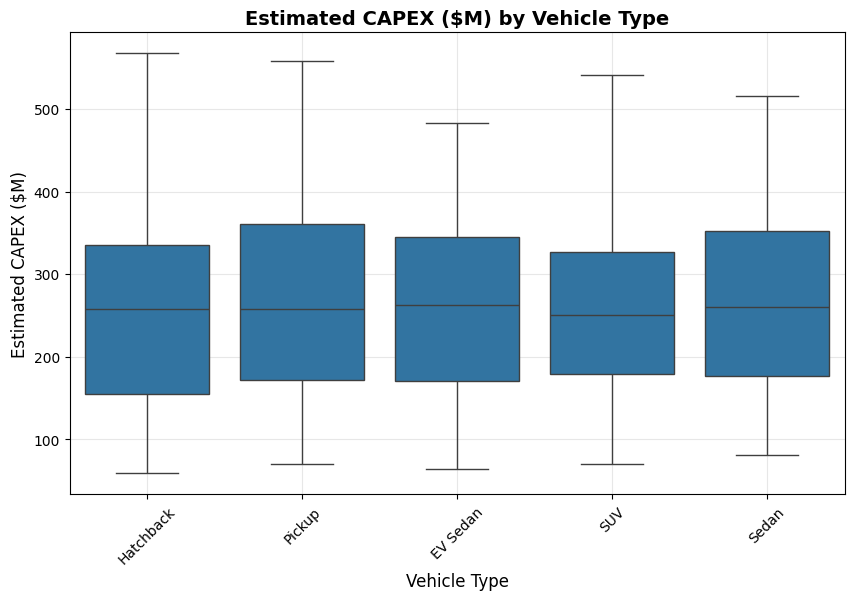

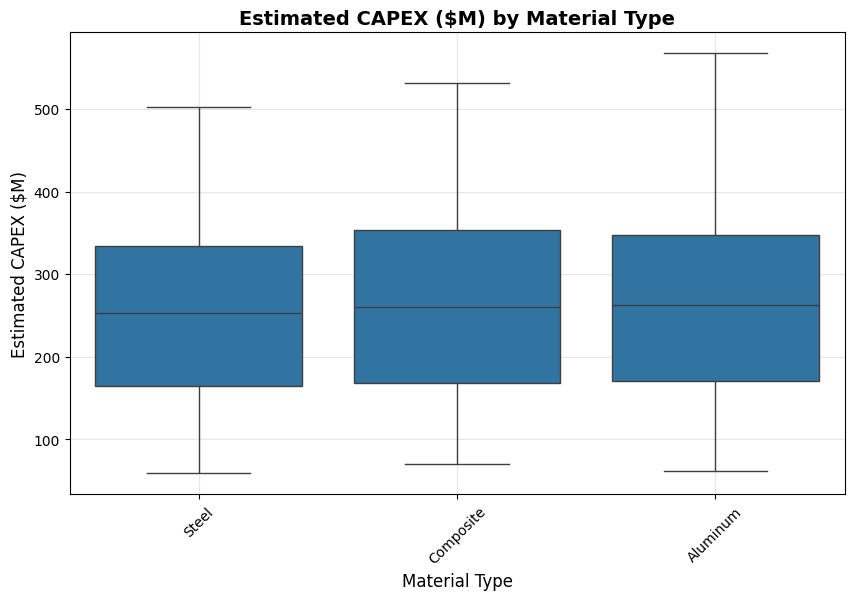

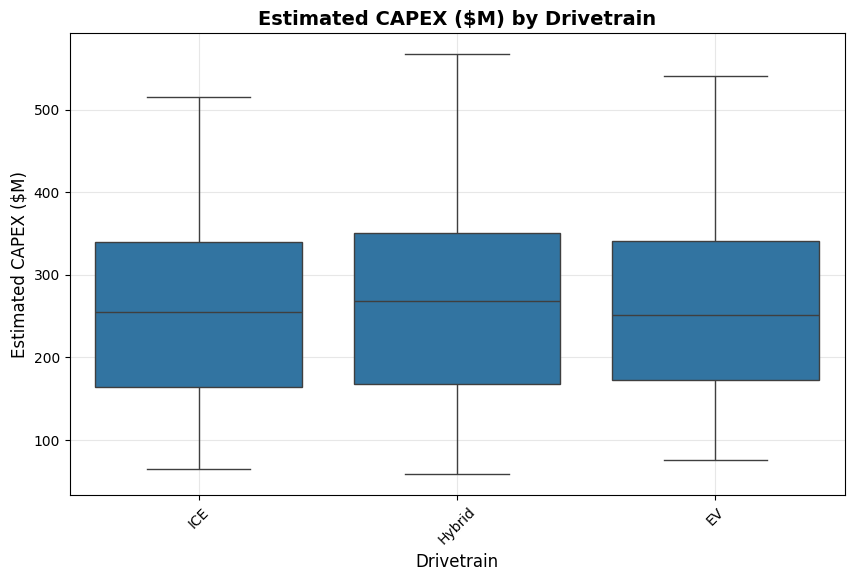

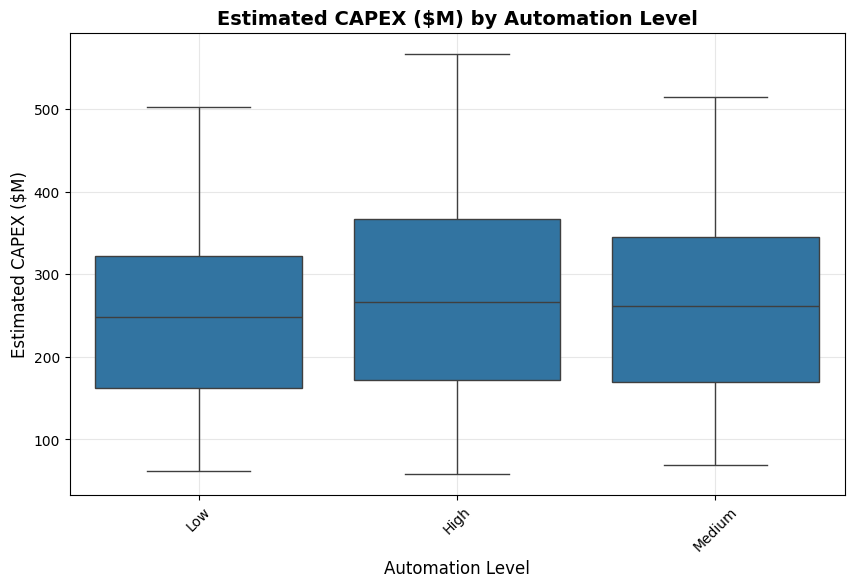

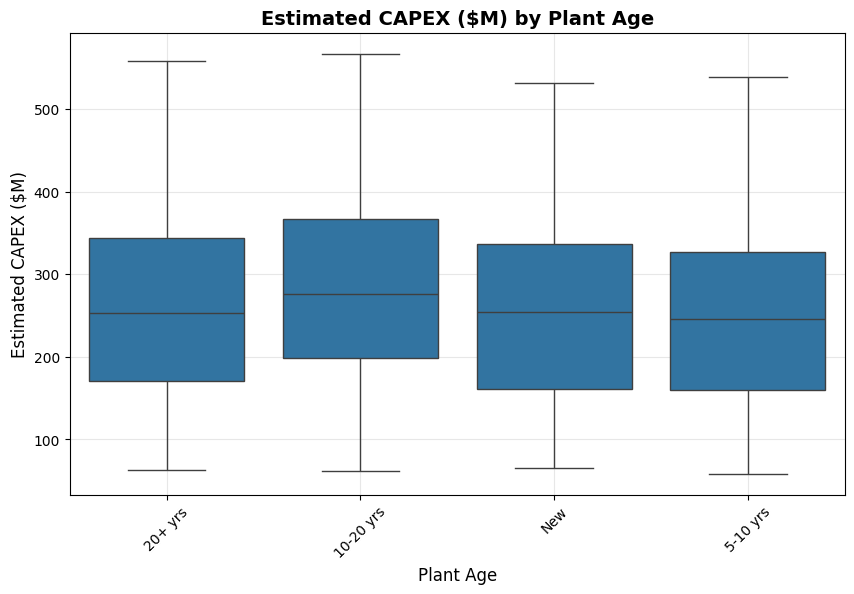

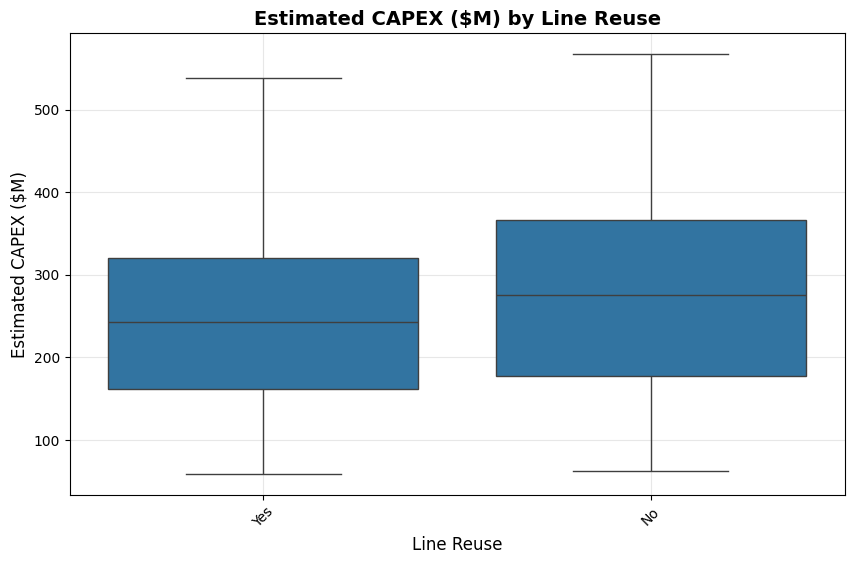

In [6]:
### Plot all the features against target variable 'Actual CAPEX ($M)' to see the relationship
for feature in numerical_features:
    if feature != 'Actual CAPEX ($M)':
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=df, x=feature, y='Estimated CAPEX ($M)', alpha=0.6)
        plt.title(f'Estimated CAPEX ($M) vs {feature}', fontsize=14, fontweight='bold')
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Estimated CAPEX ($M)', fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature, y='Estimated CAPEX ($M)')
    plt.title(f'Estimated CAPEX ($M) by {feature}', fontsize=14, fontweight='bold')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Estimated CAPEX ($M)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.3)
    plt.show()
    

In [7]:
df.shape

(1000, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Vehicle Type                  1000 non-null   object 
 1   Material Type                 1000 non-null   object 
 2   Drivetrain                    1000 non-null   object 
 3   Automation Level              1000 non-null   object 
 4   Plant Age                     1000 non-null   object 
 5   Line Reuse                    1000 non-null   object 
 6   Lifetime Volume               1000 non-null   int64  
 7   Target Annual Volume          1000 non-null   float64
 8   Variants                      1000 non-null   int64  
 9   Number of Parts               1000 non-null   int64  
 10  Avg Part Complexity           1000 non-null   float64
 11  BIW Weight (kg)               1000 non-null   float64
 12  Stamping Dies                 1000 non-null   int64  
 13  Inje

### Train Test Split

In [9]:
### train test split
# df.drop(columns=['Program'], inplace=True)
X = df.drop(columns=['Estimated CAPEX ($M)'])
y = df['Estimated CAPEX ($M)']
# y = np.log1p(df['Actual CAPEX ($M)'])

In [10]:
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test (you can adjust the ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Feature Engineering

In [11]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Scale numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Label encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    # Use the same encoder for test data
    X_test[col] = le.transform(X_test[col])

X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

X_train_processed.shape, X_test_processed.shape


((800, 19), (200, 19))

### Model Training

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 500, 800],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5, 0.7],  # remove 'auto'
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train_processed, y_train)

print("Best Hyperparameters:", rf_random.best_params_)
print("Best CV R2:", rf_random.best_score_)
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test_processed)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R2: {r2:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best CV R2: 0.9693526972177186
Test MAE: 12.7956
Test MSE: 264.8247
Test RMSE: 16.2734
Test R2: 0.9773


### Applying xgboost

In [13]:
# ### Apply XGboost Regressor
# import xgboost as xgb
# xgbr = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
# xgbr.fit(X_train_processed, y_train)
# y_pred_xgb = xgbr.predict(X_test_processed)
# mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
# mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# rmse_xgb = np.sqrt(mse_xgb)
# r2_xgb = r2_score(y_test, y_pred_xgb)
# print(f"XGBoost Test MAE: {mae_xgb:.4f}")
# print(f"XGBoost Test MSE: {mse_xgb:.4f}")
# print(f"XGBoost Test RMSE: {rmse_xgb:.4f}")
# print(f"XGBoost Test R2: {r2_xgb:.4f}")

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# XGBoost Regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 1.5, 2, 3]
}

xgb_random = RandomizedSearchCV(
    estimator=xgbr,
    param_distributions=param_dist,
    n_iter=50,           # number of random combinations
    scoring='r2',        # or 'neg_mean_absolute_error'
    cv=5,                # 5-fold CV
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit CV search
xgb_random.fit(X_train_processed, y_train)

# Best hyperparameters
print("Best Hyperparameters:", xgb_random.best_params_)
print("Best CV R2:", xgb_random.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 1.0}
Best CV R2: 0.992687815590347


In [14]:
# Use the best estimator from CV
best_xgb = xgb_random.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_processed)

# Metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Test MAE: {mae_xgb:.4f}")
print(f"XGBoost Test MSE: {mse_xgb:.4f}")
print(f"XGBoost Test RMSE: {rmse_xgb:.4f}")
print(f"XGBoost Test R2: {r2_xgb:.4f}")


XGBoost Test MAE: 6.1352
XGBoost Test MSE: 64.9794
XGBoost Test RMSE: 8.0610
XGBoost Test R2: 0.9944


In [15]:
# # Predict using the best estimator
# best_model = rf_random.best_estimator_
# y_pred = best_model.predict(X_test_processed)

# # Evaluate
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.3f}")


In [16]:
## Applying linear regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_processed, y_train)
y_pred_lr = lr.predict(X_test_processed)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression Test MAE: {mae_lr:.4f}")
print(f"Linear Regression Test MSE: {mse_lr:.4f}")
print(f"Linear Regression Test RMSE: {rmse_lr:.4f}")
print(f"Linear Regression Test R2: {r2_lr:.4f}")


Linear Regression Test MAE: 8.4551
Linear Regression Test MSE: 118.4880
Linear Regression Test RMSE: 10.8852
Linear Regression Test R2: 0.9899
